In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv('../data/data.csv')

In [6]:
X,y = data.drop('Estado al egreso', axis=1), data['Estado al egreso']

In [7]:
import pickle as pkl

with open('../models/rf.pkl', 'rb') as file:
    best_rf = pkl.load(file)


with open('../models/lr.pkl', 'rb') as file:
    best_lr = pkl.load(file)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

best_rf.fit(X_scaled, y)

coefs = best_rf.feature_importances_
base_importances_rf = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(base_importances_rf)

Sofa                                           0.352717
# de hemoderivados  usados                     0.270039
componentes triada letal                       0.109430
Daño orgánico tubular asociado                 0.060579
Edad                                           0.055069
App Cardiopatía Isquémica                      0.050000
Apache II                                      0.044931
Número de compresas utilizadas                 0.019382
VAM                                            0.017949
Horas transcurridas al desempaquetamiento      0.014193
App HTA                                        0.005711
Etiología del empaquetamiento                  0.000000
App AB                                         0.000000
Sexo                                           0.000000
Lesión de vía biliar asociada                  0.000000
Presencia de hipotensión arterial o shock      0.000000
Tiempo quirúrgico                              0.000000
App DM                                         0

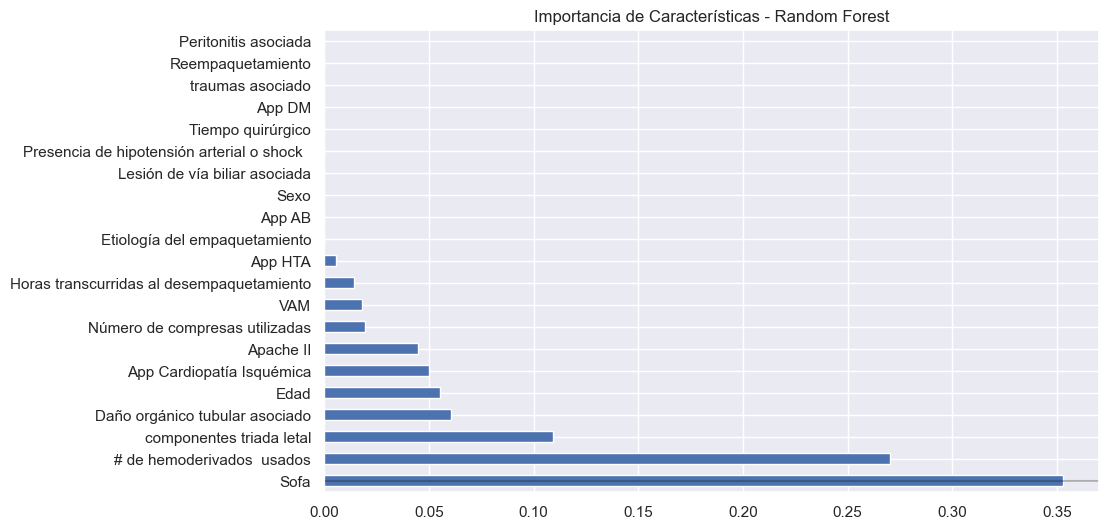

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
base_importances_rf.plot(kind='barh')

plt.title('Importancia de Características - Random Forest')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_rf.feature_importances_,
    'Abs_Coefficient': np.abs(best_rf.feature_importances_)
}).sort_values('Abs_Coefficient', ascending=False)


In [10]:
best_lr.fit(X_scaled, y)

coefs = best_lr.coef_[0]
base_importances_lr = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(base_importances_lr)

componentes triada letal                       0.196777
Sofa                                           0.184955
VAM                                            0.158918
Apache II                                      0.131098
App Cardiopatía Isquémica                      0.127576
Horas transcurridas al desempaquetamiento      0.105114
# de hemoderivados  usados                     0.094480
traumas asociado                               0.093495
Daño orgánico tubular asociado                 0.090667
Sexo                                           0.077167
App HTA                                        0.070436
Número de compresas utilizadas                 0.063096
Lesión de vía biliar asociada                  0.051951
App AB                                         0.038569
Presencia de hipotensión arterial o shock      0.035157
Tiempo quirúrgico                              0.022660
Reempaquetamiento                              0.019734
Peritonitis asociada                           0

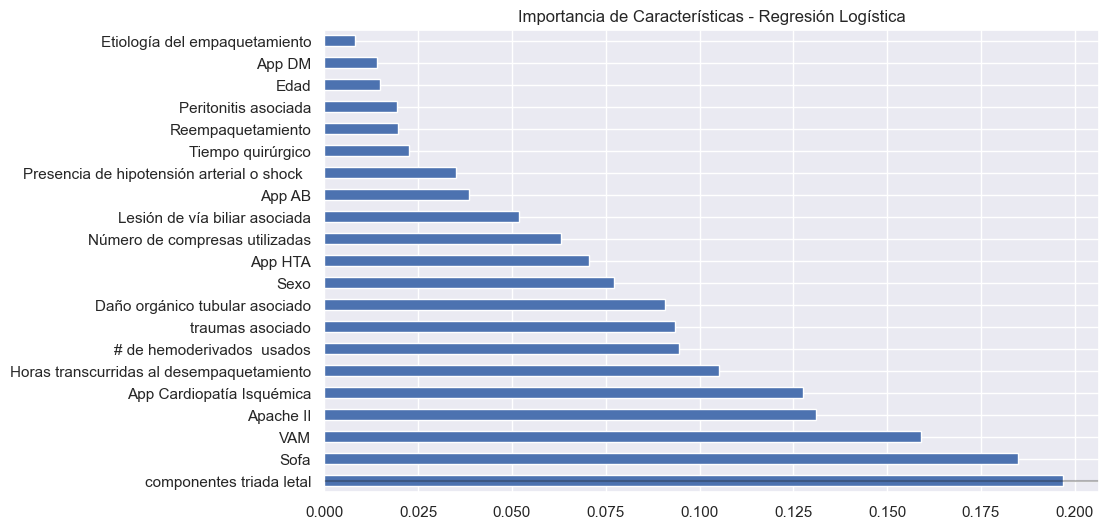

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
base_importances_lr.plot(kind='barh')

plt.title('Importancia de Características - Regresión Logística')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0],
    'Abs_Coefficient': np.abs(best_lr.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)


In [12]:
rf_norm = base_importances_rf / base_importances_rf.abs().max()
lr_norm = base_importances_lr / base_importances_lr.abs().max()

feature_consensus = pd.DataFrame({
    'RF_importance': rf_norm,
    'LR_importance': lr_norm,
    'Consensus': (rf_norm + lr_norm) / 2
}).sort_values('Consensus', ascending=False)

feature_consensus

,RF_importance,LR_importance,Consensus
Sofa,1.000000,0.939922,0.969961
componentes triada letal,0.310250,1.000000,0.655125
# de hemoderivados usados,0.765597,0.480138,0.622868
VAM,0.050887,0.807603,0.429245
Apache II,0.127385,0.666224,0.396804
App Cardiopatía Isquémica,0.141757,0.648329,0.395043
Daño orgánico tubular asociado,0.171749,0.460762,0.316256
Horas transcurridas al desempaquetamiento,0.040240,0.534179,0.287209
traumas asociado,0.000000,0.475130,0.237565
Sexo,0.000000,0.392155,0.196077


In [15]:
feature_consensus[:5]

,RF_importance,LR_importance,Consensus
Sofa,1.000000,0.939922,0.969961
componentes triada letal,0.310250,1.000000,0.655125
# de hemoderivados usados,0.765597,0.480138,0.622868
VAM,0.050887,0.807603,0.429245
Apache II,0.127385,0.666224,0.396804
